In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import networkx as nx
import sys

sys.path.append("../")
from plotroutines import *

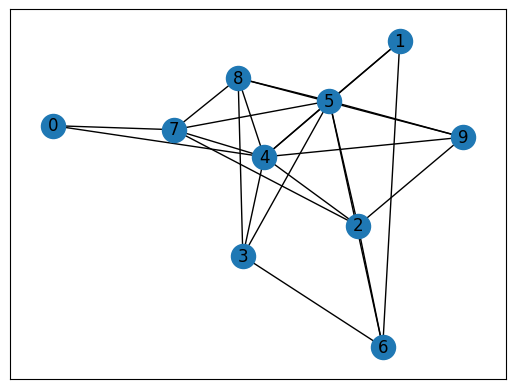

In [3]:
G = nx.read_gml("data/w_ba_n10_k4_0.gml")
nx.draw_networkx(G)
mincost = -8.657714089848158  # precalculated

In [4]:
qaoa_flip = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    flip=True,
)
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
)

In [5]:
maxdepth = 10
qaoa_flip.optimize(depth=maxdepth)
qaoa.optimize(depth=maxdepth)


2024-06-21 16:11:55 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2024-06-21 16:11:55 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2024-06-21 16:11:55 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2024-06-21 16:11:55 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2024-06-21 16:11:59 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2024-06-21 16:11:59 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2024-06-21 16:11:59 [info     ] cost(depth 1 = -6.951114875221417 file=qaoa.qaoa func=optimize
2024-06-21 16:11:59 [info     ] cost(depth 2 = -6.742438631482997 file=qaoa.qaoa func=optimize
2024-06-21 16:12:00 [info     ] cost(depth 3 = -6.609881464340424 file=qaoa.qaoa func=optimize
2024-06-21 16:12:01 [info     ] cost(depth 4 = -5.962335563752

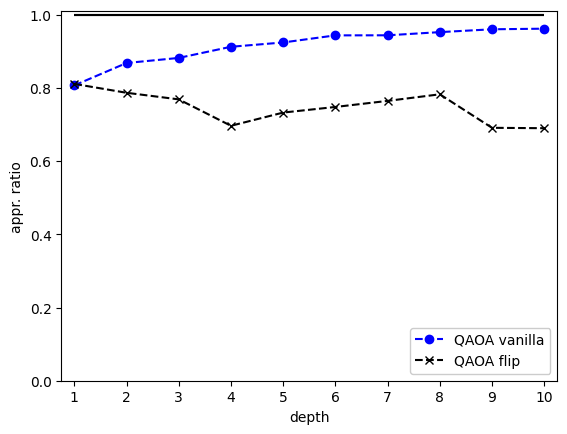

In [6]:
fig = pl.figure()
plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA vanilla",
    style="o--b",
    fig=fig,
)
plot_ApproximationRatio(
    qaoa_flip,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA flip",
    style="x--k",
    fig=fig,
)